In [223]:
from imutils import paths
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from random import shuffle
import timeit

from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import Xception
from tensorflow.keras.layers import AveragePooling2D, Dropout, Flatten, Dense, Input
from tensorflow.keras.models import Model, model_from_json
from tensorflow.keras.optimizers import Adam

from tensorflow.keras.applications import imagenet_utils
from tensorflow.keras.applications.xception import decode_predictions

In [224]:
print("[INFO]: Trying to Read the images")
#  Configure the Image Location
# 이미지 위치 구성하기
imagePaths = list(paths.list_images(r'C:\Users\cvpr\Documents\Bishal\Allergic Rhinitis\Dataset\non_rotate'))

[INFO]: Trying to Read the images


In [225]:
imagePaths

['C:\\Users\\cvpr\\Documents\\Bishal\\Allergic Rhinitis\\Dataset\\non_rotate\\dataset0\\0\\n13_1_00002_right.tif',
 'C:\\Users\\cvpr\\Documents\\Bishal\\Allergic Rhinitis\\Dataset\\non_rotate\\dataset0\\0\\n13_1_00003_left.tif',
 'C:\\Users\\cvpr\\Documents\\Bishal\\Allergic Rhinitis\\Dataset\\non_rotate\\dataset0\\0\\n13_2_00001_right.tif',
 'C:\\Users\\cvpr\\Documents\\Bishal\\Allergic Rhinitis\\Dataset\\non_rotate\\dataset0\\0\\n14_1_00001_right.tif',
 'C:\\Users\\cvpr\\Documents\\Bishal\\Allergic Rhinitis\\Dataset\\non_rotate\\dataset0\\0\\n14_1_00007_left.tif',
 'C:\\Users\\cvpr\\Documents\\Bishal\\Allergic Rhinitis\\Dataset\\non_rotate\\dataset0\\0\\n15_2_00005_left.tif',
 'C:\\Users\\cvpr\\Documents\\Bishal\\Allergic Rhinitis\\Dataset\\non_rotate\\dataset0\\0\\n1_1_00001_right.tif',
 'C:\\Users\\cvpr\\Documents\\Bishal\\Allergic Rhinitis\\Dataset\\non_rotate\\dataset0\\0\\n6_1_00004_right.tif',
 'C:\\Users\\cvpr\\Documents\\Bishal\\Allergic Rhinitis\\Dataset\\non_rotate\\dataset

In [226]:
shuffle(imagePaths)
imagePaths

['C:\\Users\\cvpr\\Documents\\Bishal\\Allergic Rhinitis\\Dataset\\non_rotate\\dataset1\\1\\13_2_00002_right.tif',
 'C:\\Users\\cvpr\\Documents\\Bishal\\Allergic Rhinitis\\Dataset\\non_rotate\\dataset3\\1\\33_1_00005_left.tif',
 'C:\\Users\\cvpr\\Documents\\Bishal\\Allergic Rhinitis\\Dataset\\non_rotate\\dataset0\\0\\n13_1_00002_right.tif',
 'C:\\Users\\cvpr\\Documents\\Bishal\\Allergic Rhinitis\\Dataset\\non_rotate\\dataset3\\2\\20_2_00008_left.tif',
 'C:\\Users\\cvpr\\Documents\\Bishal\\Allergic Rhinitis\\Dataset\\non_rotate\\dataset4\\2\\35_1_00002_right.tif',
 'C:\\Users\\cvpr\\Documents\\Bishal\\Allergic Rhinitis\\Dataset\\non_rotate\\dataset3\\1\\28_1_00003_left.tif',
 'C:\\Users\\cvpr\\Documents\\Bishal\\Allergic Rhinitis\\Dataset\\non_rotate\\dataset3\\0\\n29_3_00005_left.tif',
 'C:\\Users\\cvpr\\Documents\\Bishal\\Allergic Rhinitis\\Dataset\\non_rotate\\dataset2\\2\\15_1_00006_left.tif',
 'C:\\Users\\cvpr\\Documents\\Bishal\\Allergic Rhinitis\\Dataset\\non_rotate\\dataset2\\1\\

In [227]:
imagePaths = list(paths.list_images("Dataset/rotate"))
len(imagePaths)
imagePaths[0].split(os.path.sep)[-3]

'dataset0'

In [228]:
len(imagePaths)

90

In [229]:
from datetime import datetime
datetime.now().strftime('%H:%M:%S')

'20:12:27'

In [230]:
# Initialize data and labels
# 데이터 및 레이블 초기화
data = []
labels = []
dirList= []

In [231]:
# Formatting data and labels
for imagePath in imagePaths:
    # Extract the class label from file name and append to labels
    # 파일 이름에서 클래스 레이블을 추출하고 레이블에 추가함
    label = imagePath.split(os.path.sep)[-2]
    labels.append(label)
    # Load the image, swap color channels, and resize it to be a fixed 224x224 pixels while ignoring the aspect ratio
    # 이미지를 로드하고, 컬러 채널을 스왑하고, 가로 세로 비율을 무시하고 고정 224x224 픽셀로 크기를 조정함
    image = cv2.imread(imagePath)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, (224,224))
    # Append to data
    # 데이터에 추가
    data.append(image)

# Convert the data and labels to NumPy arrays while scaling the pixel intensities to the range [0,1]
# 픽셀 강도를 [0,1] 범위로 조정하면서 데이터와 레이블을 NumPy 배열로 변환
data = np.array(data) / 255.0
labels = np.array(labels)

In [232]:
labels.shape

(90,)

In [233]:
labels

array(['0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '1', '1', '2',
       '2', '2', '2', '2', '2', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '1', '1', '1', '1', '2', '2', '2', '2', '2', '2', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '1', '1', '1', '2', '2', '2',
       '2', '2', '2', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1',
       '1', '1', '2', '2', '2', '2', '2', '2', '0', '0', '0', '0', '0',
       '0', '0', '0', '1', '1', '1', '2', '2', '2', '2', '2', '2'],
      dtype='<U1')

In [234]:
data[0].shape

(224, 224, 3)

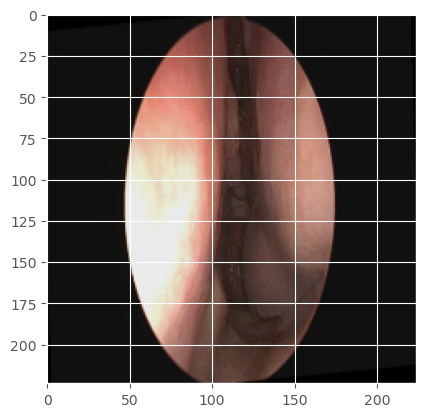

In [235]:
plt.imshow(data[1])

In [236]:
# Perform the one-hot encoding on the labels
# 레이블에 대해 원핫 인코딩 수행
lb = LabelBinarizer()
labels = lb.fit_transform(labels)
print(labels)

[[1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]]


In [237]:
# Initialize the training data augmentation
# 교육 데이터 억멘테이션 초기화
trainAug = ImageDataGenerator(rotation_range=40, zoom_range=0.15, width_shift_range=0.2, height_shift_range=0.2,
		shear_range=0.15,fill_mode="nearest", horizontal_flip=True)

In [238]:
labels.shape

(90, 3)

In [239]:
# Partition the data into training and testing splits using 80% of the training data and the remaining 20% for testing
# 교육 데이터의 80%, 테스트에 20%를 사용하여 데이터를 교육 및 테스트 분할로 분할
(trainX, testX, trainY, testY) = train_test_split(data, labels, test_size=0.20, stratify=labels, random_state=42)

In [16]:
# Load the network, ensuring the Head-FC layer sets are left off
# Head-FC 레이어 세트가 포함되지 않도록 네트워크를 로드한다
baseModel = Xception(weights="imagenet", include_top=False, input_tensor=Input(shape=(224,224,3)))

In [17]:
# Construct the head model that will be placed on the top of the base model
# 보디 모델의 맨 위에 배치할 헤드 모델 구성
headModel = baseModel.output
headModel = AveragePooling2D(pool_size=(4,4))(headModel)
headModel = Flatten(name="flatten")(headModel)
headModel = Dense(64, activation="relu")(headModel)
headModel = Dropout(0.5)(headModel)
headModel = Dense(3, activation="softmax")(headModel)

In [18]:
# Place the Head-FC model on top of the Base model - This become the actual model that we will train
# Head-FC 모델을 보디 모델 위에 배치한다. 이것이 우리가 교육할 실제 모델이 될 것이다.
model = Model(inputs=baseModel.input, outputs=headModel)

In [19]:
# Make sure that the basemodel layers will not be trained and only head model will be trained.
# 보디 모델 레이어가 훈련되지 않고 헤드 모델만 훈련되는지 확인한다.
for layer in baseModel.layers:
    layer.trainable = False

In [20]:
trainX.shape

(72, 224, 224, 3)

In [21]:
testX.shape

(18, 224, 224, 3)

In [22]:
# Set the hyper-parameters
# 하이퍼 파라미터 설정
# INIT_LR = 1e-3
INIT_LR = 0.001
EPOCHS = 100
BS = 8

In [23]:
# Compile the Model
# 모델 컴파일
opt = Adam(learning_rate=INIT_LR, decay=INIT_LR / EPOCHS)
model.compile(loss="binary_crossentropy", optimizer=opt, metrics=["accuracy"])

In [24]:
# Train the Network Model
# 모델 교육
print("[INFO] Model Training")
start = timeit.default_timer()
H = model.fit(
        trainAug.flow(trainX, trainY, batch_size=BS),
        steps_per_epoch=len(trainX) // BS,
        validation_data=(testX, testY),
        validation_steps=len(testX) // BS,
        epochs=EPOCHS)

[INFO] Model Training
Epoch 1/100
9/9 [==============================] - 9s 391ms/step - loss: 0.6139 - accuracy: 0.4722 - val_loss: 0.6250 - val_accuracy: 0.5000
Epoch 2/100
9/9 [==============================] - 1s 96ms/step - loss: 0.6423 - accuracy: 0.4722 - val_loss: 0.5992 - val_accuracy: 0.5000
Epoch 3/100
9/9 [==============================] - 1s 95ms/step - loss: 0.5758 - accuracy: 0.5556 - val_loss: 0.6057 - val_accuracy: 0.5556
Epoch 4/100
9/9 [==============================] - 1s 101ms/step - loss: 0.5953 - accuracy: 0.5278 - val_loss: 0.5738 - val_accuracy: 0.5000
Epoch 5/100
9/9 [==============================] - 1s 101ms/step - loss: 0.5533 - accuracy: 0.5833 - val_loss: 0.5779 - val_accuracy: 0.5556
Epoch 6/100
9/9 [==============================] - 1s 101ms/step - loss: 0.5468 - accuracy: 0.6389 - val_loss: 0.5668 - val_accuracy: 0.6111
Epoch 7/100
9/9 [==============================] - 1s 98ms/step - loss: 0.5371 - accuracy: 0.5556 - val_loss: 0.5559 - val_accuracy: 0

Epoch 59/100
9/9 [==============================] - 1s 93ms/step - loss: 0.3419 - accuracy: 0.7778 - val_loss: 0.5733 - val_accuracy: 0.6111
Epoch 60/100
9/9 [==============================] - 1s 92ms/step - loss: 0.4072 - accuracy: 0.7222 - val_loss: 0.5817 - val_accuracy: 0.6667
Epoch 61/100
9/9 [==============================] - 1s 93ms/step - loss: 0.3760 - accuracy: 0.8194 - val_loss: 0.5252 - val_accuracy: 0.5556
Epoch 62/100
9/9 [==============================] - 1s 90ms/step - loss: 0.3985 - accuracy: 0.7222 - val_loss: 0.5192 - val_accuracy: 0.6111
Epoch 63/100
9/9 [==============================] - 1s 97ms/step - loss: 0.3993 - accuracy: 0.7083 - val_loss: 0.5399 - val_accuracy: 0.5000
Epoch 64/100
9/9 [==============================] - 1s 94ms/step - loss: 0.3668 - accuracy: 0.7639 - val_loss: 0.5404 - val_accuracy: 0.5556
Epoch 65/100
9/9 [==============================] - 1s 92ms/step - loss: 0.3313 - accuracy: 0.8194 - val_loss: 0.5281 - val_accuracy: 0.6111
Epoch 66/100


In [25]:
stop = timeit.default_timer()
print('Total Training Time: ', stop - start) 

Total Training Time:  100.9855828


In [26]:
testX.shape

(18, 224, 224, 3)

In [57]:
testX[:1].shape

(1, 224, 224, 3)

In [27]:
# Make predictions on the testing set
# 테스트 세트에서 예측한다
print("Making Predictions on the Test Set")
predIdxs = model.predict(testX, batch_size=BS)
preds = predIdxs
predIdxs = np.argmax(predIdxs, axis=1)
print("Classification Report")
print(classification_report(testY.argmax(axis=1), predIdxs, target_names=lb.classes_))

Making Predictions on the Test Set
Classification Report
              precision    recall  f1-score   support

           0       0.64      0.78      0.70         9
           1       1.00      0.33      0.50         3
           2       0.67      0.67      0.67         6

    accuracy                           0.67        18
   macro avg       0.77      0.59      0.62        18
weighted avg       0.71      0.67      0.66        18



In [28]:
preds

array([[6.1212754e-01, 1.1366256e-01, 2.7420986e-01],
       [1.9275207e-02, 3.3377830e-03, 9.7738701e-01],
       [7.7732755e-03, 5.2066296e-03, 9.8702013e-01],
       [4.8911893e-01, 5.9350007e-03, 5.0494605e-01],
       [9.8577030e-02, 8.5304290e-01, 4.8380002e-02],
       [9.9928027e-01, 1.8987308e-04, 5.2988151e-04],
       [7.7304548e-01, 3.0292779e-02, 1.9666179e-01],
       [9.6622747e-01, 3.0289469e-02, 3.4830442e-03],
       [9.8536265e-01, 6.9756752e-05, 1.4567617e-02],
       [9.9938393e-01, 1.1126048e-05, 6.0493156e-04],
       [9.2017674e-01, 7.8940853e-02, 8.8240131e-04],
       [9.7629410e-01, 1.7990831e-03, 2.1906840e-02],
       [9.9980003e-01, 8.7046232e-05, 1.1298811e-04],
       [2.7671301e-01, 2.2527624e-03, 7.2103423e-01],
       [6.9347084e-02, 2.3583284e-01, 6.9482005e-01],
       [8.9208615e-01, 3.9469977e-03, 1.0396685e-01],
       [3.5992327e-01, 5.0521150e-02, 5.8955556e-01],
       [9.4362229e-01, 2.9251981e-03, 5.3452577e-02]], dtype=float32)

In [29]:
len(predIdxs)

18

In [30]:
# Compute Confusion Matrix and derrive raw, accuracy, sensitivity, specificity from it
# 혼란 매트릭스
cm= confusion_matrix(testY.argmax(axis=1), predIdxs)
total = sum(sum(cm))
acc = (cm[0,0] + cm[1,1] + cm[2,2]) / total

sensitivity = cm[0, 0] / (cm[0, 0] + cm[0, 1])
specificity = cm[1, 1] / (cm[1, 0] + cm[1, 1])
# show the confusion matrix, accuracy, sensitivity, and specificity
# 혼란 매트릭스 보기
print("Confusion Matrix and its Derrivatives")
print(cm)
print("acc: {:.4f}".format(acc))
print("sensitivity: {:.4f}".format(sensitivity))
print("specificity: {:.4f}".format(specificity))

Confusion Matrix and its Derrivatives
[[7 0 2]
 [2 1 0]
 [2 0 4]]
acc: 0.6667
sensitivity: 1.0000
specificity: 0.3333


In [31]:
H.history["accuracy"]

[0.4722222089767456,
 0.4722222089767456,
 0.5555555820465088,
 0.5277777910232544,
 0.5833333134651184,
 0.6388888955116272,
 0.5555555820465088,
 0.6388888955116272,
 0.6388888955116272,
 0.5972222089767456,
 0.6111111044883728,
 0.6805555820465088,
 0.625,
 0.7638888955116272,
 0.625,
 0.6666666865348816,
 0.6805555820465088,
 0.6111111044883728,
 0.7083333134651184,
 0.6944444179534912,
 0.7361111044883728,
 0.6805555820465088,
 0.6111111044883728,
 0.6805555820465088,
 0.6944444179534912,
 0.6944444179534912,
 0.6944444179534912,
 0.6944444179534912,
 0.6944444179534912,
 0.7222222089767456,
 0.6944444179534912,
 0.7083333134651184,
 0.6944444179534912,
 0.7222222089767456,
 0.75,
 0.7638888955116272,
 0.7222222089767456,
 0.6944444179534912,
 0.7083333134651184,
 0.7916666865348816,
 0.6805555820465088,
 0.7222222089767456,
 0.7222222089767456,
 0.7222222089767456,
 0.7638888955116272,
 0.7222222089767456,
 0.75,
 0.8194444179534912,
 0.6805555820465088,
 0.7916666865348816,
 0.6

Final Plot Generated.


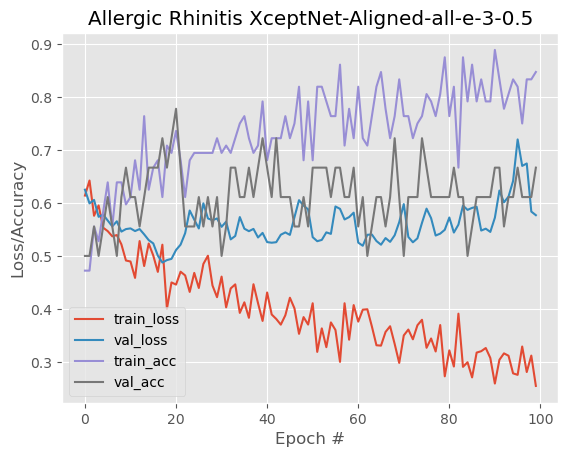

In [32]:
# plot the training loss and accuracy
# 플롯 그래프
print("Final Plot Generated.")
N = EPOCHS
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, N), H.history["val_accuracy"], label="val_acc")
plt.title("Allergic Rhinitis XceptNet-Aligned-all-e-3-0.5")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")
#plt.savefig("[iter-3] [XCEPTN] plot,rotate-1e3")

model.output_shape # model summary representation
model.summary() # model configuration
model.get_config() # list all weight tensors in the model

In [33]:
model.output_shape

(None, 3)

In [34]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 111, 111, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, 111, 111, 32) 128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, 111, 111, 32) 0           block1_conv1_bn[0][0]            
______________________________________________________________________________________________

model.summary()

In [43]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 111, 111, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, 111, 111, 32) 128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, 111, 111, 32) 0           block1_conv1_bn[0][0]            
______________________________________________________________________________________________

In [35]:
preds

array([[6.1212754e-01, 1.1366256e-01, 2.7420986e-01],
       [1.9275207e-02, 3.3377830e-03, 9.7738701e-01],
       [7.7732755e-03, 5.2066296e-03, 9.8702013e-01],
       [4.8911893e-01, 5.9350007e-03, 5.0494605e-01],
       [9.8577030e-02, 8.5304290e-01, 4.8380002e-02],
       [9.9928027e-01, 1.8987308e-04, 5.2988151e-04],
       [7.7304548e-01, 3.0292779e-02, 1.9666179e-01],
       [9.6622747e-01, 3.0289469e-02, 3.4830442e-03],
       [9.8536265e-01, 6.9756752e-05, 1.4567617e-02],
       [9.9938393e-01, 1.1126048e-05, 6.0493156e-04],
       [9.2017674e-01, 7.8940853e-02, 8.8240131e-04],
       [9.7629410e-01, 1.7990831e-03, 2.1906840e-02],
       [9.9980003e-01, 8.7046232e-05, 1.1298811e-04],
       [2.7671301e-01, 2.2527624e-03, 7.2103423e-01],
       [6.9347084e-02, 2.3583284e-01, 6.9482005e-01],
       [8.9208615e-01, 3.9469977e-03, 1.0396685e-01],
       [3.5992327e-01, 5.0521150e-02, 5.8955556e-01],
       [9.4362229e-01, 2.9251981e-03, 5.3452577e-02]], dtype=float32)

In [35]:
model.save("ARhinitisModel", save_format="h5")
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)

C:\Users\cvpr\anaconda3\lib\site-packages\tensorflow\python\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


print("[INFO] saving Allergic Rhinitis detector model...")
model.save("ARhinitisModel", save_format="h5")
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)

decoded = imagenet_utils.decode_predictions(preds)

gradCAM


In [140]:
# Display
from IPython.display import Image, display
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import tensorflow as tf
from tensorflow import keras

In [141]:
def get_img_array(img_path, size):
    # `img` is a PIL image of size 299x299
    img = keras.preprocessing.image.load_img(img_path, target_size=size)
    # `array` is a float32 Numpy array of shape (299, 299, 3)
    array = keras.preprocessing.image.img_to_array(img)
    # We add a dimension to transform our array into a "batch"
    # of size (1, 299, 299, 3)
    array = np.expand_dims(array, axis=0)
    return array


def make_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index=None):
    # First, we create a model that maps the input image to the activations
    # of the last conv layer as well as the output predictions
    grad_model = tf.keras.models.Model(
        [model.inputs], [model.get_layer(last_conv_layer_name).output, model.output]
    )

    # Then, we compute the gradient of the top predicted class for our input image
    # with respect to the activations of the last conv layer
    with tf.GradientTape() as tape:
        last_conv_layer_output, preds = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(preds[0])
        class_channel = preds[:, pred_index]

    # This is the gradient of the output neuron (top predicted or chosen)
    # with regard to the output feature map of the last conv layer
    grads = tape.gradient(class_channel, last_conv_layer_output)

    # This is a vector where each entry is the mean intensity of the gradient
    # over a specific feature map channel
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    # We multiply each channel in the feature map array
    # by "how important this channel is" with regard to the top predicted class
    # then sum all the channels to obtain the heatmap class activation
    last_conv_layer_output = last_conv_layer_output[0]
    heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)

    # For visualization purpose, we will also normalize the heatmap between 0 & 1
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()

In [142]:
testX[0].shape

(224, 224, 3)

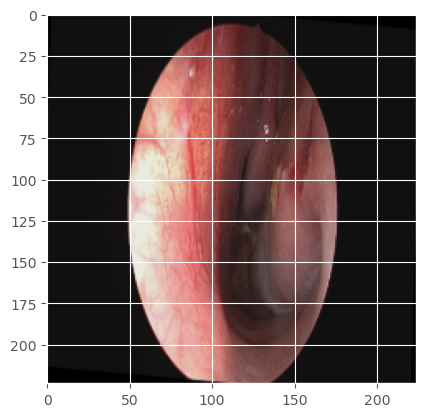

In [241]:
plt.imshow(testX[0])
plt.show()

In [143]:
preprocess_input = keras.applications.xception.preprocess_input

In [144]:
for i in testX:
    image = np.expand_dims(i, axis=0)
    image = imagenet_utils.preprocess_input(i)

In [145]:
testX[0:1].shape

(1, 224, 224, 3)

In [187]:
img_array = preprocess_input(get_img_array(imagePath, size=(224,224)))

In [188]:
img_path = imagePath

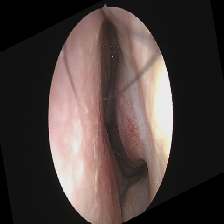

In [189]:

img = keras.preprocessing.image.load_img(img_path, target_size=(224, 224))
img

In [190]:
array = keras.preprocessing.image.img_to_array(img)
    # We add a dimension to transform our array into a "batch"
    # of size (1, 299, 299, 3)

In [243]:
array = np.expand_dims(testX[0], axis=0)
array

array([[[[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        ...,

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]]]])

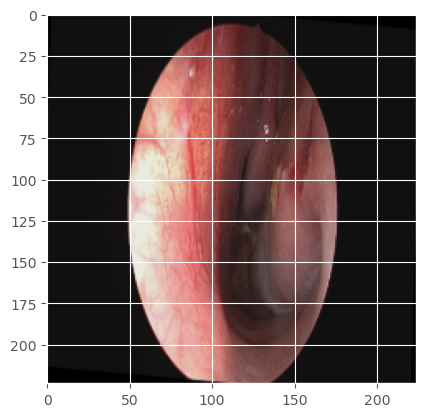

In [245]:
plt.imshow(array[0])
plt.show()

In [147]:
img_array2 = preprocess_input(testX[-2:-1])

In [170]:
img_1 = img_array2[0] 

In [171]:
img_1 = np.uint8(255 * img_1)

In [173]:
img_1

array([[[ 2, 16, 43],
        [ 2, 16, 43],
        [ 2, 16, 43],
        ...,
        [ 2, 16, 43],
        [ 2, 16, 43],
        [ 2, 16, 43]],

       [[ 2, 16, 43],
        [ 2, 16, 43],
        [ 2, 16, 43],
        ...,
        [ 2, 16, 43],
        [ 2, 16, 43],
        [ 2, 16, 43]],

       [[ 2, 16, 43],
        [ 2, 16, 43],
        [ 2, 16, 43],
        ...,
        [ 2, 16, 43],
        [ 2, 16, 43],
        [ 2, 16, 43]],

       ...,

       [[ 2, 16, 43],
        [ 2, 16, 43],
        [ 2, 16, 43],
        ...,
        [ 2, 16, 43],
        [ 2, 16, 43],
        [ 2, 16, 43]],

       [[ 2, 16, 43],
        [ 2, 16, 43],
        [ 2, 16, 43],
        ...,
        [ 2, 16, 43],
        [ 2, 16, 43],
        [ 2, 16, 43]],

       [[ 2, 16, 43],
        [ 2, 16, 43],
        [ 2, 16, 43],
        ...,
        [ 2, 16, 43],
        [ 2, 16, 43],
        [ 2, 16, 43]]], dtype=uint8)

In [175]:
print(img_array)

[[[[-1. -1. -1.]
   [-1. -1. -1.]
   [-1. -1. -1.]
   ...
   [-1. -1. -1.]
   [-1. -1. -1.]
   [-1. -1. -1.]]

  [[-1. -1. -1.]
   [-1. -1. -1.]
   [-1. -1. -1.]
   ...
   [-1. -1. -1.]
   [-1. -1. -1.]
   [-1. -1. -1.]]

  [[-1. -1. -1.]
   [-1. -1. -1.]
   [-1. -1. -1.]
   ...
   [-1. -1. -1.]
   [-1. -1. -1.]
   [-1. -1. -1.]]

  ...

  [[-1. -1. -1.]
   [-1. -1. -1.]
   [-1. -1. -1.]
   ...
   [-1. -1. -1.]
   [-1. -1. -1.]
   [-1. -1. -1.]]

  [[-1. -1. -1.]
   [-1. -1. -1.]
   [-1. -1. -1.]
   ...
   [-1. -1. -1.]
   [-1. -1. -1.]
   [-1. -1. -1.]]

  [[-1. -1. -1.]
   [-1. -1. -1.]
   [-1. -1. -1.]
   ...
   [-1. -1. -1.]
   [-1. -1. -1.]
   [-1. -1. -1.]]]]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


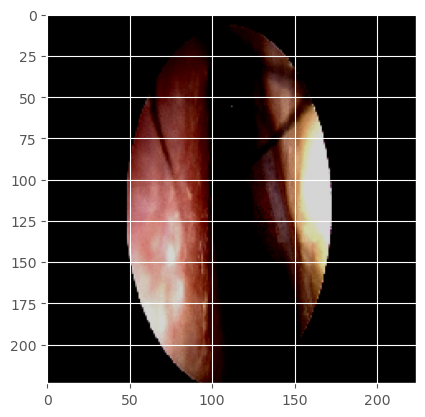

In [150]:
plt.imshow(img_array[0])
plt.show()

In [151]:
img_array2.shape

(1, 224, 224, 3)

In [152]:
img_array.shape

(1, 224, 224, 3)

In [153]:
last_conv_layer_name = "block14_sepconv2_act"

[[0.61212933 0.11366235 0.2742084 ]]
(7, 7)


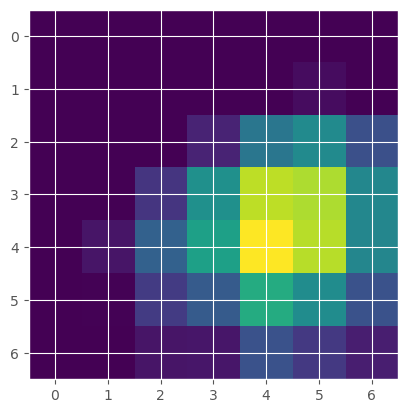

In [247]:
# Prepare image
#img_array = testX[:1]

# Remove last layer's softmax
model.layers[-1].activation = None

# Print what the top predicted class is
preds = model.predict(array)
#print("Predicted:", decode_predictions(preds, top=1)[0])
print(preds)

# Generate class activation heatmap
heatmap = make_gradcam_heatmap(array, model, last_conv_layer_name)
print(heatmap.shape)

# Display heatmap
plt.imshow(heatmap)
plt.show()

In [123]:
img_array2[0].shape

(224, 224, 3)

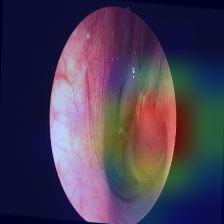

In [271]:
def save_and_display_gradcam(img_path, heatmap, cam_path="cam.jpg", alpha=0.4, img_=None):
    # Load the original image
    img = keras.preprocessing.image.load_img(img_path)
    img = keras.preprocessing.image.img_to_array(img)
   

    # Rescale heatmap to a range 0-255
    heatmap = np.uint8(255 * heatmap)

    # Use jet colormap to colorize heatmap
    jet = cm.get_cmap("jet")

    # Use RGB values of the colormap
    jet_colors = jet(np.arange(256))[:, :3]
    jet_heatmap = jet_colors[heatmap]

    # Create an image with RGB colorized heatmap
    jet_heatmap = keras.preprocessing.image.array_to_img(jet_heatmap)
    jet_heatmap = jet_heatmap.resize((img.shape[1], img.shape[0]))
    jet_heatmap = keras.preprocessing.image.img_to_array(jet_heatmap)

    # Superimpose the heatmap on original image
    superimposed_img = jet_heatmap * alpha + img
    superimposed_img = keras.preprocessing.image.array_to_img(superimposed_img)

    # Save the superimposed image
    superimposed_img.save(cam_path)

    # Display Grad CAM
    display(Image(cam_path))


save_and_display_gradcam("tio.jpg", heatmap, img_=array[0])

In [261]:
img = keras.preprocessing.image.load_img(imagePath)
img = keras.preprocessing.image.img_to_array(img)
sum(img)

array([[1785., 1779., 1778.],
       [1845., 1842., 1841.],
       [1910., 1907., 1915.],
       ...,
       [1866., 1874., 1867.],
       [1793., 1804., 1802.],
       [1740., 1755., 1742.]], dtype=float32)

In [265]:
img101 = keras.preprocessing.image.array_to_img(array[0])

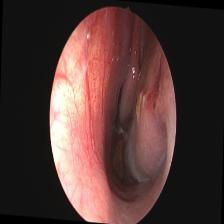

In [269]:
img101.save("temp.jpg")
display(Image("temp.jpg"))

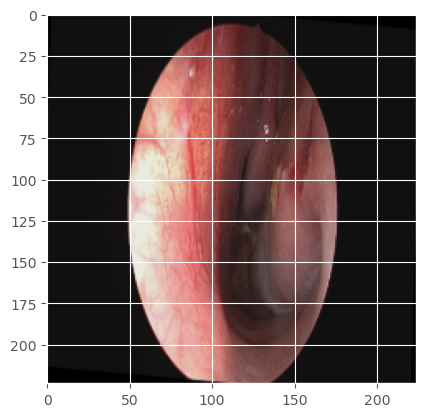

In [258]:


plt.imshow(array[0])
plt.show()



In [96]:
outpath = "gradMap.jpg"

In [100]:
outpath.split(".")[0]+"Nis"+outpath.split(".")[-1]

'gradMapNisjpg'

In [90]:
import gradCam2

In [91]:
img_ = imagePaths[24]

In [94]:
heat = gradCam2.getHeatMap(img_, model, "block14_sepconv2_act")

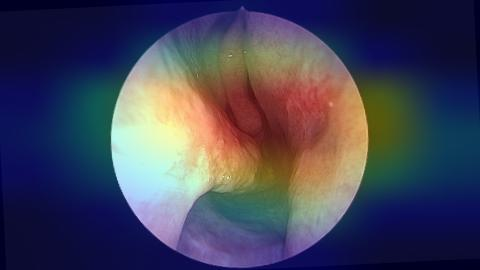

In [95]:
gradCam2.save_and_display_gradcam(img_, heat)